In [39]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

from pandas_datareader import data, wb
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = data.DataReader("F", 'yahoo', start, end)

### Let's find some time series data
hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [40]:
f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,8.201456,60855800
2010-01-05,10.45,11.24,10.40,10.96,8.743967,215620200
2010-01-06,11.21,11.46,11.13,11.37,9.071067,200070600
2010-01-07,11.46,11.69,11.32,11.66,9.302429,130201700
2010-01-08,11.67,11.74,11.46,11.69,9.326366,130463000


### Plot the high and low values of Yahoo's stock for July and August 2012

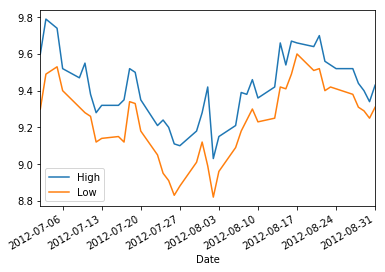

In [41]:
# 
f['2012-07':'2012-08'][['High', 'Low']].plot()

### Is the variance of the trading volume relatively stable over time?

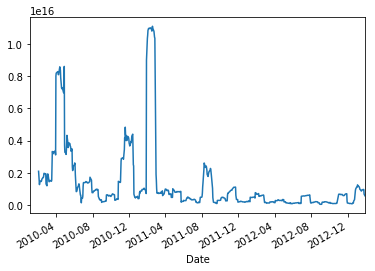

In [49]:
#
r = f.rolling(20).var()['Volume'].plot()

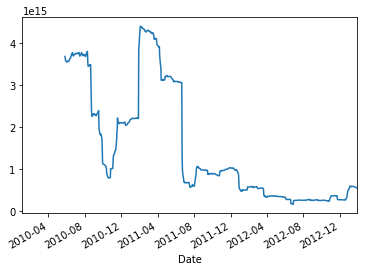

In [53]:
# using a variable window
r = f.rolling(100).var()['Volume'].plot()

### Is the expanding window variance of the trading volume relatively stable over time?

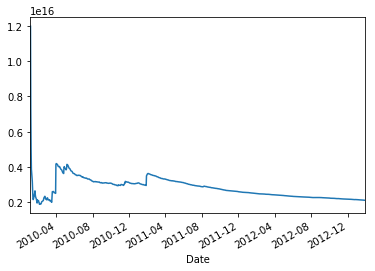

In [43]:
# 
r = f.expanding().var()['Volume'].plot()

### On how many days did the stock close higher than it opened?

Hint: check out .tshift() in the pandas docs
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging

In [57]:
#
len(f[f.Close > f.Open])

353

In [54]:
len(f)

772

### And did the 'up' days become more or less frequent over time?

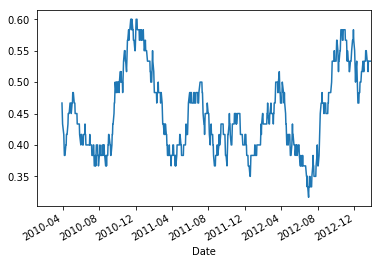

In [60]:
# 
f['DayGain'] = f.Close-f.Open
f.rolling(window = 60)['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

### Compute and plot the mean monthly High value of the stock

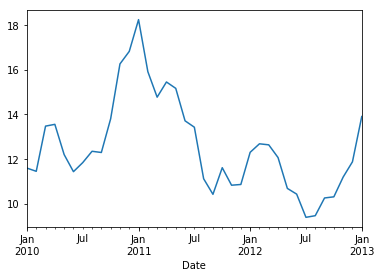

In [46]:
# f.resample('M')
f.resample('M').mean()['High'].plot()

### Explore the variance of the differenced volume

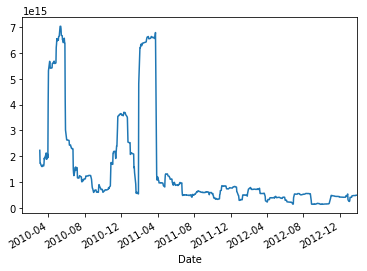

In [67]:
# 
volume = f.Volume
volume_lagged = f.Volume.shift()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window = 40).var().plot()

### Does the lagged time series correlate with itself?

In [48]:
# 
pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.656506
real,0.656506,1.000000
